# Overfitting 방지 실습

## Import modules

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 하이퍼파라미터 정의

In [2]:
EPOCHS = 50

## 네트워크 구조 정의

In [3]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()                       # 28x28 = 784
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(64, activation='relu')
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')  # 10

    def call(self, x, training=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        return self.dense5(h)

## 데이터 불러오기

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

## 모델 생성

- sparse_categorical_crossentropy
    - sparse : y범주가 3개 이상 (one-hot encoding 아닐때)
    - categorical : y가 연속형이 아니라 범주형 변수
    - crossentropy : loss함수의 한 종류

In [5]:
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 학습 

In [6]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Epoch 1/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5177 - accuracy: 0.8125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00s: 0.6085 - - 21s 13ms/step - loss: 0.5306 - accura - 21s 13ms/ste - 22s 13ms/step - loss: 0.5281 - accuracy: 0.809  - 22s 13ms/step - loss: 0.5258 - accura - 22s 13ms/step -  - 23s 13ms/step - loss: 0.5227 - accuracy: 0.81 - 23s 13ms/step - loss: 0.5228 -  - 23s 12ms/step - loss: 0.51
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3811 - accuracy: 0.8609 - val_loss: 0.4037 - val_accuracy: 0.8562
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3479 - accuracy: 0.8725 - val_loss: 0.3836 - val_accuracy: 0.8642
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3231 - accuracy: 0.8805 - val_loss: 0.3660 - val_accuracy: 0.8672
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3086 - accuracy: 0.8856 - val_loss: 0.3491 - val_a

- 반복할수록 train데이터의 loss는 꾸준히 감소한다... 당연함
- 반복할수록 val_loss는 감소하다가 어느지점부터는 증가한다... 어느지점이 최적의 epoch일때이고, 넘어가면 overfitting 됨
- val_loss는 감소하다가 어느지점부터는 증가하지만
- val_accuracy는 쭉 증가한다... 잘 맞추는지와 loss값이 다를 수도 있다

## Matplotlib를 이용한 시각화 

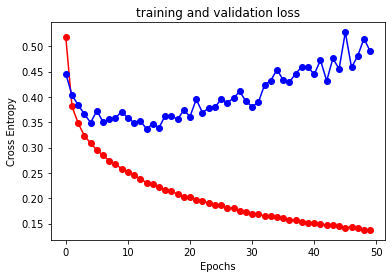

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epochs')
plt.title('training and validation loss')
plt.show()

## Early stopping callback으로 성능 개선하기

- overfitting 방지 위해 특정 epoch에서 실행을 멈춰줌

In [8]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# 10번의 epoch동안 val_loss가 감소하지 않으면 멈춰준다

## 모델 학습 2

In [9]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1369 - accuracy: 0.9471 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1336 - accuracy: 0.9484 - val_loss: 0.4898 - val_accuracy: 0.8851
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1356 - accuracy: 0.9493 - val_loss: 0.5443 - val_accuracy: 0.8918
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1347 - accuracy: 0.9482 - val_loss: 0.5239 - val_accuracy: 0.8891
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1313 - accuracy: 0.9502 - val_loss: 0.4933 - val_accuracy: 0.8914
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1274 - accuracy: 0.9510 - val_loss: 0.5531 - val_accuracy: 0.8889
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1312 - accuracy: 0.9497 - val_loss: 0.5052 - val_

## Matplotlib를 이용한 시각화 

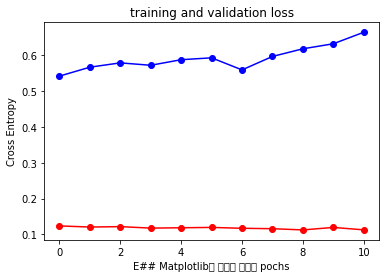

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('E## Matplotlib를 이용한 시각화 pochs')
plt.title('training and validation loss')
plt.show()

## Drop out으로 성능 개선하기
- 특정 확률로 각 노드를 사용할지 말지 결정
- dense4에 drop out 적용함
- 노드 64개면 underfitting날 수 있으므로 128개로 올려줌

In [11]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()                       # 28x28 = 784
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout4 = tf.keras.layers.Dropout(0.5)
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')  # 10

    def call(self, x, training=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        return self.dense5(h)

- early stopping callback

In [12]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

## 모델 학습 3

In [13]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1238 - accuracy: 0.9532 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1208 - accuracy: 0.9535 - val_loss: 0.5659 - val_accuracy: 0.8877
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1219 - accuracy: 0.9530 - val_loss: 0.5779 - val_accuracy: 0.8858
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1178 - accuracy: 0.9542 - val_loss: 0.5712 - val_accuracy: 0.8870
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1187 - accuracy: 0.9540 - val_loss: 0.5867 - val_accuracy: 0.8807
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1197 - accuracy: 0.9541 - val_loss: 0.5919 - val_accuracy: 0.8853
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1173 - accuracy: 0.9550 - val_loss: 0.5583 - val_

## Matplotlib를 이용한 시각화 

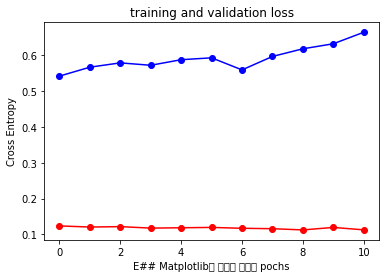

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('E## Matplotlib를 이용한 시각화 pochs')
plt.title('training and validation loss')
plt.show()